In [19]:
from sympy.abc import x,y,z
from sympy import Matrix, solve, exp
from sympy.tensor.array import derive_by_array, Array

from sympy import init_printing

init_printing()

In [20]:
f = exp(x**2+y**2+z**2) - x**4 -y**6 -z**6
gradient = derive_by_array(f, [x,y,z])  # Use %time to see how fast this computes
hessian  = Matrix( [derive_by_array(gradient, a) for a in [x,y,z]])

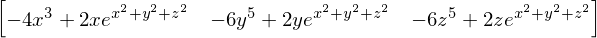

In [21]:
gradient

In [22]:
gradient.subs({x:0,y:0,z:0})

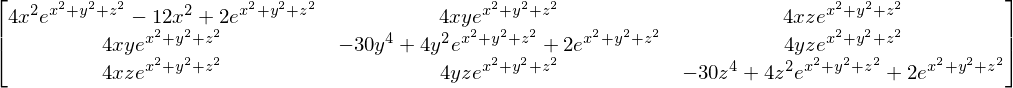

In [23]:
hessian

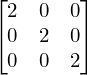

In [24]:
hessian.subs({x:0,y:0,z:0})

In [25]:
def f(x): return x**2-2

In [26]:
import numpy as np, matplotlib.pyplot as plt
plt.xkcd();

In [27]:
def search(f,fd,x0,steps):
    outputx=[x0,x0]
    outputy=[0,f(x0)]
    for step in range(steps):
        xn = x0-f(x0)/fd(x0)
        outputx.append(xn)
        outputx.append(xn)
        outputy.append(0)
        outputy.append(f(xn))
        x0 = xn
    return (outputx, outputy)
        

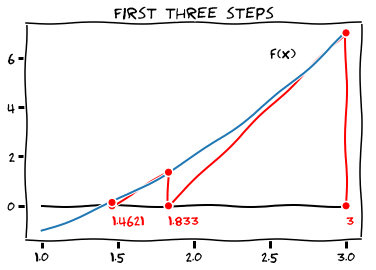

In [28]:
ox,oy = search(f,lambda x: 2*x,3,2)
# print(ox)

x=np.linspace(1,3)
plt.figure()
plt.plot([1,3],[0,0],'k')
plt.plot(ox,oy,'r')
plt.plot(x,f(x))
plt.plot(ox,np.zeros_like(ox),'or')
plt.plot(ox,[f(t) for t in ox],'or')
plt.text(3,-0.75,'3',color='r')
plt.text(1.83,-0.75,'1.833',color='r')
plt.text(1.4621,-0.75,'1.4621',color='r')
plt.text(2.5,6,'f(x)')
plt.title('First three steps')
plt.show()

[1.46, 1.46, 1.4149315068493151, 1.4149315068493151, 1.4142137445176965, 1.4142137445176965, 1.4142135623731067, 1.4142135623731067]
[0, 0.13159999999999972, 0, 0.002031169074873329, 0, 5.151827648930407e-07, 0, 3.2862601528904634e-14]


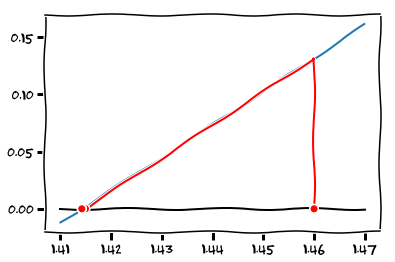

In [29]:
ox,oy = search(f,lambda x: 2*x,1.46,3)
print(ox)
print(oy)
x=np.linspace(1.41,1.47)
plt.figure()
plt.plot([1.41,1.47],[0,0],'k')
plt.plot(x,f(x))
plt.plot(ox,oy,'r')
plt.plot(ox,np.zeros_like(ox),'or')
# plt.text(3,-0.75,'3',color='r')
# plt.text(1.83,-0.75,'1.833',color='r')
# plt.text(1.4621,-0.75,'1.4621',color='r')
# plt.text(2.5,6,'f(x)')
plt.show()

In [30]:
def search_output(f,fd,x0,steps):
    output = '\\begin{tabular}{|c|c|c|} \\hline \n'
    output += '$n$ & $x_n$ & $f(x_n)$ \\\\ \hline \hline \n'
    output += ('$0$ & $%1.15f$ & $%1.4E$ \\\\ \\hline \n' % (x0, f(x0)))
#     outputx=[x0,x0]
#     outputy=[0,f(x0)]
    for step in range(steps):
        xn = x0-f(x0)/fd(x0)
#         outputx.append(xn)
#         outputx.append(xn)
#         outputy.append(0)
#         outputy.append(f(xn))
        x0 = xn
        output += '$%d$ & $%1.15f$ & $%1.4E$ \\\\ \\hline \n' % (step+1,xn,f(xn)) 
                      
    
    output += r'\end{tabular}'
    return output

In [31]:
print(search_output(f,lambda x: 2*x, 3,7))

\begin{tabular}{|c|c|c|} \hline 
$n$ & $x_n$ & $f(x_n)$ \\ \hline \hline 
$0$ & $3.000000000000000$ & $7.0000E+00$ \\ \hline 
$1$ & $1.833333333333333$ & $1.3611E+00$ \\ \hline 
$2$ & $1.462121212121212$ & $1.3780E-01$ \\ \hline 
$3$ & $1.414998429894803$ & $2.2206E-03$ \\ \hline 
$4$ & $1.414213780047198$ & $6.1568E-07$ \\ \hline 
$5$ & $1.414213562373112$ & $4.7518E-14$ \\ \hline 
$6$ & $1.414213562373095$ & $-4.4409E-16$ \\ \hline 
$7$ & $1.414213562373095$ & $4.4409E-16$ \\ \hline 
\end{tabular}
